In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path2csv = './csv/'
path2plots = './plots/grammar_distribution/'

In [3]:
def csv_to_df(path2csv):
    df_all_from_csv = []
    print(path2csv)
    
    for root, dirs, files in os.walk(path2csv):
        print(root, files)
        for file in files:
            if not file.endswith('.csv'):
                continue
            df = pd.read_csv(os.path.join(root, file), skiprows=range(0,6))
            df.set_index(['[run number]', '[step]'], inplace=True)
            df_all_from_csv.append(df)
    return df_all_from_csv

In [4]:
df_all_from_csv = csv_to_df(path2csv)

./csv/
./csv/ ['Language Change_converge_stop experiment8-reward-alpha-table.csv', 'Language Change_converge_stop experiment1-individual-perc-table.csv', 'Language Change_converge_stop experiment3-threshold-perc-table.csv', 'Language Change_converge_stop experiment2-threshold-perc-thres-table.csv', 'Language Change_converge_stop experiment4-reward-perc-table.csv', 'Language Change_converge_stop experiment11-individual-population-table.csv', 'Language Change_converge_stop experiment9-reward-population-table.csv', 'Language Change_converge_stop experiment6-threshold-sink-state-table.csv', 'Language Change_converge_stop experiment5-threshold-thres-table.csv', 'Language Change_converge_stop experiment7-reward-logistic-table.csv', 'Language Change_converge_stop experiment10-threshold-population-table.csv']


In [5]:
df_all_from_csv[0]

logistic?  alpha update-algorithm  num-nodes  \
[run number] [step]                                                 
6            0            True   0.00           reward        100   
7            0            True   0.00           reward        100   
6            1            True   0.00           reward        100   
7            1            True   0.00           reward        100   
             2            True   0.00           reward        100   
...                        ...    ...              ...        ...   
543          977          True   0.05           reward        100   
             978          True   0.05           reward        100   
             979          True   0.05           reward        100   
             980          True   0.05           reward        100   
             981          True   0.05           reward        100   

                     percent-grammar-1  sink-state-1?  threshold-val  \
[run number] [step]                                                    
6            0                      60           True            0.3   
7            0                      60           True            0.3   
6            1                      60           True            0.3   
7            1                      60           True            0.3   
             2                      60           True            0.3   
...                                ...            ...            ...   
543          977                    60           True            0.3   
             978                    60           True            0.3   
             979                    60           True            0.3   
             980                    60           True            0.3   
             981                    60           True            0.3   

                     final-grammar1-distribution  
[run number] [step]                               
6            0                          0.600000  
7            0                          0.600000  
6            1                          0.600147  
7            1                          0.600074  
             2                          0.599624  
...                                          ...  
543          977                        0.989519  
             978                        0.989631  
             979                        0.989742  
             980                        0.989851  
             981                        0.989959  

[2454790 rows x 8 columns]

In [6]:
def plot_err_bars(df):
    infection_type = df['update-algorithm'].iloc[0]
    if infection_type == 'individual' or infection_type == 'threshold':
        params = ['threshold-val', 'percent-grammar-1', 'num-nodes']
    else:
        params = ['alpha', 'logistic?', 'num-nodes']
    print(params)
    for p in params:
        vals, counts = np.unique(df[p], return_counts=True)
        if len(vals) == 1:
            continue

        temp_df = df.reset_index(inplace=False).groupby([p, "[run number]"]).max()["final-grammar1-distribution"]
        display_df = temp_df.reset_index(inplace=False).groupby(p).agg({'final-grammar1-distribution': ['mean', 'min', 'max', 'std']})
        display(display_df)
        fig, ax = plt.subplots()
        plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.5) 
        ax.errorbar(display_df.index.values, display_df['final-grammar1-distribution']['mean'], yerr=display_df['final-grammar1-distribution']['std'], fmt='o')
        ax.set_xlabel(p)
        ax.set_ylabel('final-grammar1-distribution')
        ax.set_ylim(0, 1.05)
        plt.title(infection_type)
        plt.savefig(path2plots + infection_type + '_grammar1_distr_' + p + '.png', bbox_inches='tight')
        plt.show()

new experiment
['alpha', 'logistic?', 'num-nodes']


final-grammar1-distribution                              
                             mean       min       max       std
alpha                                                          
0.000                    0.840380  0.638678  0.989933  0.096817
0.005                    0.940928  0.781729  0.989999  0.057431
0.010                    0.972855  0.877888  0.989997  0.028114
0.015                    0.980600  0.855332  0.989999  0.024659
0.020                    0.986645  0.936097  0.989997  0.011614
0.025                    0.988475  0.916175  0.989998  0.010433
0.030                    0.989945  0.989896  0.989991  0.000029
0.035                    0.989950  0.989893  0.989998  0.000031
0.040                    0.989950  0.989898  0.989992  0.000029
0.045                    0.989949  0.989900  0.989994  0.000027
0.050                    0.989949  0.989898  0.989999  0.000030

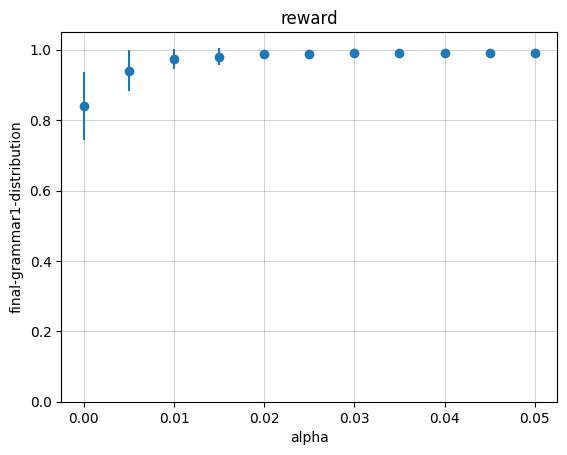

new experiment
['threshold-val', 'percent-grammar-1', 'num-nodes']


final-grammar1-distribution                     
                                         mean  min   max       std
percent-grammar-1                                                 
10                                     0.2606  0.1  0.99  0.275558
20                                     0.4820  0.2  0.99  0.321559
30                                     0.6118  0.3  0.99  0.295681
40                                     0.6944  0.4  0.99  0.242446
50                                     0.8214  0.5  0.99  0.195730
60                                     0.9000  0.6  0.99  0.124491
70                                     0.9188  0.7  0.99  0.100054
80                                     0.9474  0.8  0.99  0.062753
90                                     0.9702  0.9  0.99  0.028103

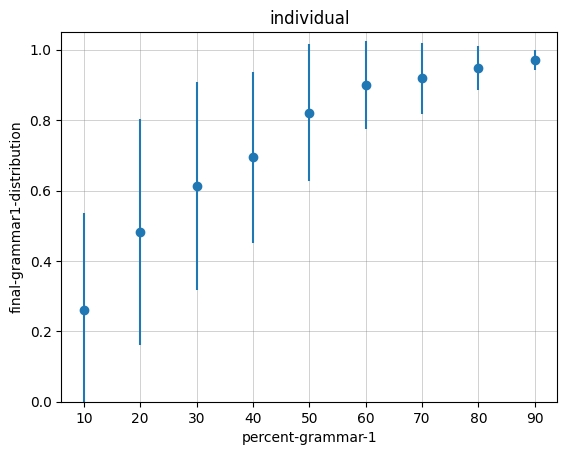

new experiment
['threshold-val', 'percent-grammar-1', 'num-nodes']


final-grammar1-distribution                      
                                         mean   min   max       std
percent-grammar-1                                                  
10                                     0.3014  0.13  0.69  0.116181
20                                     0.7136  0.39  0.94  0.155271
30                                     0.9178  0.78  0.99  0.060720
40                                     0.9526  0.84  0.99  0.041098
50                                     0.9570  0.88  0.99  0.035355
60                                     0.9606  0.89  0.99  0.029652
70                                     0.9446  0.70  0.99  0.075491
80                                     0.9252  0.80  0.99  0.083525
90                                     0.9318  0.90  0.99  0.042938

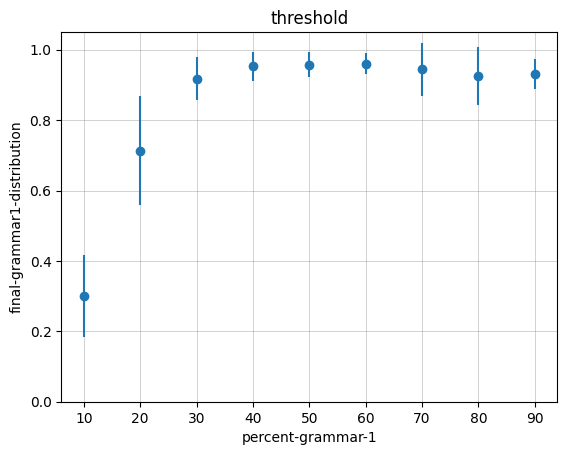

new experiment
['threshold-val', 'percent-grammar-1', 'num-nodes']


final-grammar1-distribution                      
                                     mean   min   max       std
threshold-val                                                  
0.1                              0.944000  0.76  0.99  0.055917
0.2                              0.911000  0.31  0.99  0.113600
0.3                              0.850259  0.14  0.99  0.214981
0.4                              0.786407  0.11  0.99  0.258572
0.5                              0.755889  0.11  0.99  0.274398
0.6                              0.673259  0.10  0.99  0.278805
0.7                              0.653407  0.10  0.99  0.279480
0.8                              0.635481  0.11  0.99  0.272999
0.9                              0.642667  0.10  0.98  0.268250

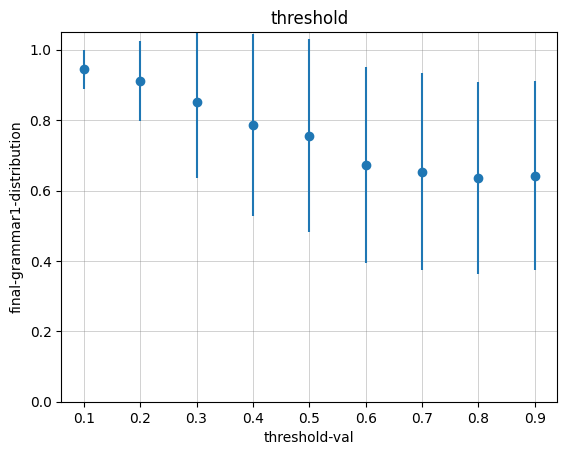

final-grammar1-distribution                      
                                         mean   min   max       std
percent-grammar-1                                                  
10                                   0.340481  0.10  0.99  0.285217
20                                   0.527407  0.22  0.99  0.267926
30                                   0.676296  0.32  0.99  0.226966
40                                   0.770000  0.47  0.99  0.171150
50                                   0.841926  0.58  0.99  0.126691
60                                   0.896519  0.60  0.99  0.083518
70                                   0.939741  0.70  0.99  0.054387
80                                   0.930556  0.80  0.99  0.073232
90                                   0.929444  0.90  0.99  0.039665

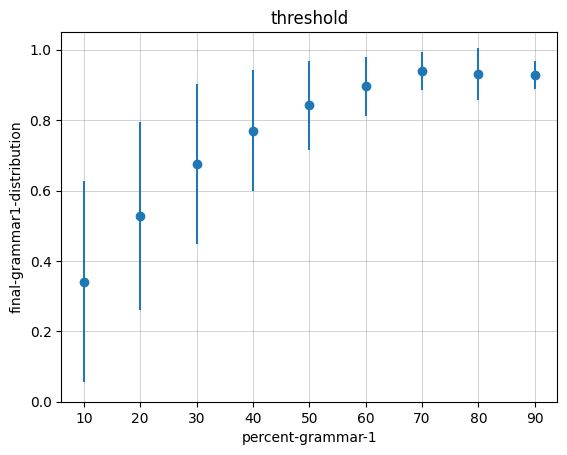

new experiment
['alpha', 'logistic?', 'num-nodes']
new experiment
['threshold-val', 'percent-grammar-1', 'num-nodes']


final-grammar1-distribution                         
                                 mean  min       max       std
num-nodes                                                     
10                           0.704000  0.6  0.900000  0.132419
20                           0.818000  0.6  0.950000  0.148379
30                           0.834667  0.6  0.966667  0.151330
40                           0.832000  0.6  0.975000  0.159323
50                           0.817200  0.6  0.980000  0.160764
60                           0.838333  0.6  0.983333  0.163793
70                           0.858286  0.6  0.985714  0.151896
80                           0.846000  0.6  0.987500  0.161238
90                           0.895556  0.6  0.988889  0.136674
100                          0.903600  0.6  0.990000  0.131052

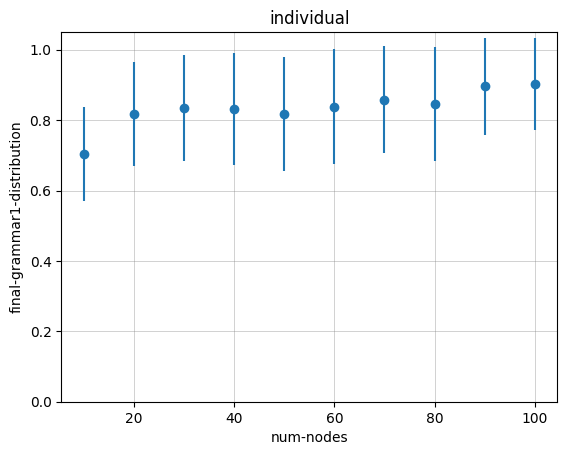

new experiment
['alpha', 'logistic?', 'num-nodes']


final-grammar1-distribution                              
                                 mean       min       max       std
num-nodes                                                          
10                           0.989944  0.989900  0.989998  0.000034
20                           0.989948  0.989893  0.989997  0.000031
30                           0.989948  0.989898  0.989998  0.000031
40                           0.989954  0.989896  0.989999  0.000029
50                           0.989952  0.989898  0.989998  0.000031
60                           0.989948  0.989899  0.989995  0.000029
70                           0.989954  0.989900  0.990000  0.000030
80                           0.989940  0.989894  0.989997  0.000028
90                           0.989947  0.989900  0.989996  0.000029
100                          0.989947  0.989896  0.989998  0.000032

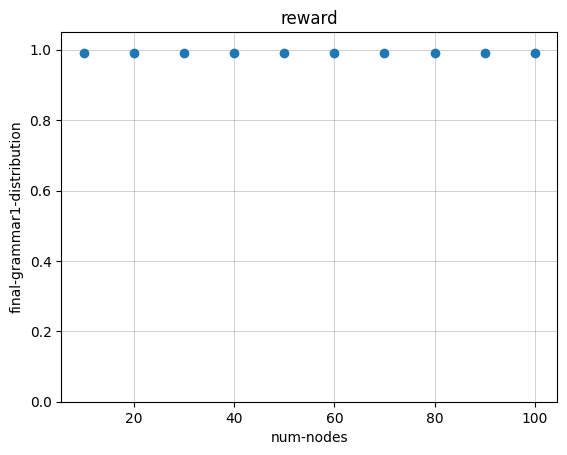

new experiment
['threshold-val', 'percent-grammar-1', 'num-nodes']
new experiment
['threshold-val', 'percent-grammar-1', 'num-nodes']


final-grammar1-distribution                      
                                     mean   min   max       std
threshold-val                                                  
0.1                                0.9422  0.60  0.99  0.058946
0.2                                0.9554  0.88  0.99  0.032212
0.3                                0.9484  0.60  0.99  0.059978
0.4                                0.9564  0.60  0.99  0.055907
0.5                                0.9580  0.84  0.99  0.029966
0.6                                0.8748  0.71  0.97  0.052847
0.7                                0.8276  0.67  0.94  0.059883
0.8                                0.7986  0.71  0.91  0.050710
0.9                                0.7990  0.69  0.90  0.055522

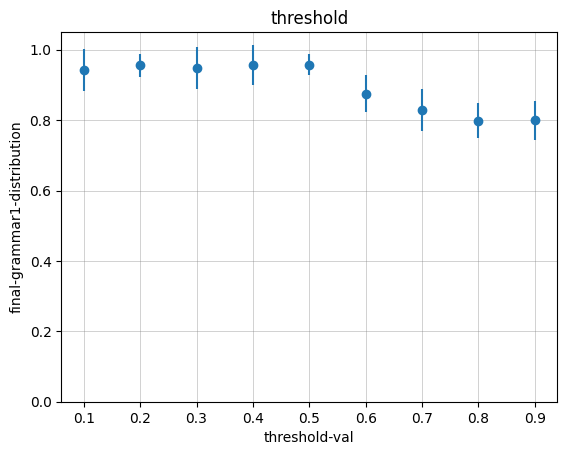

new experiment
['alpha', 'logistic?', 'num-nodes']


final-grammar1-distribution                          
                                 mean       min   max       std
logistic?                                                      
False                        0.989946  0.989898  0.99  0.000030
True                         0.988893  0.932345  0.99  0.007438

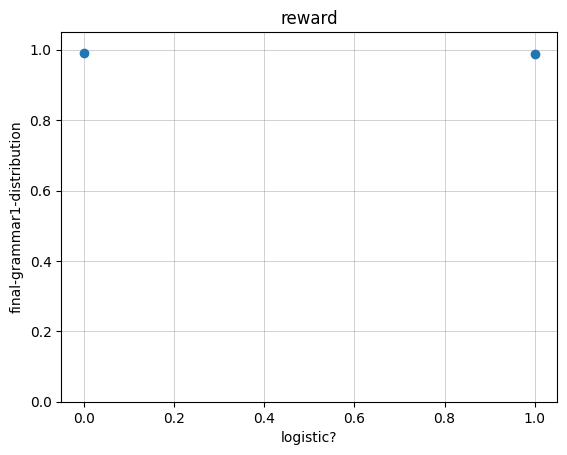

new experiment
['threshold-val', 'percent-grammar-1', 'num-nodes']


final-grammar1-distribution                              
                                 mean       min       max       std
num-nodes                                                          
10                           0.666000  0.600000  0.900000  0.122241
20                           0.808000  0.600000  0.950000  0.154312
30                           0.854000  0.600000  0.966667  0.146445
40                           0.894500  0.600000  0.975000  0.124467
50                           0.916800  0.600000  0.980000  0.100152
60                           0.936000  0.600000  0.983333  0.075695
70                           0.947429  0.600000  0.985714  0.056368
80                           0.944000  0.887500  0.987500  0.029368
90                           0.952000  0.866667  0.988889  0.032096
100                          0.958800  0.870000  0.990000  0.029668

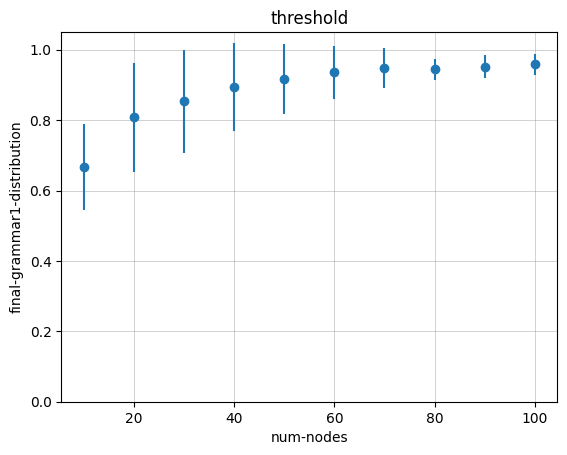

In [7]:
for experiment_df in df_all_from_csv:
    # check whether combinatorial experiment worked
    print("new experiment")
    plot_err_bars(experiment_df)

when error bars are close to 1.0, one can see that a bias towards one was used.